In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
from google.colab import drive
drive.mount("/content/gdrive")
path = "/content/gdrive/My Drive/HPC/result_1.csv"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# EX1

In [ ]:
data = pd.read_csv(path,header = 0)

In [ ]:
data.keys()

Index(['stride', 'cpu time', ' Badwidth', 'Unnamed: 3'], dtype='object')

In [ ]:
data = data[['stride', 'cpu time', ' Badwidth']]

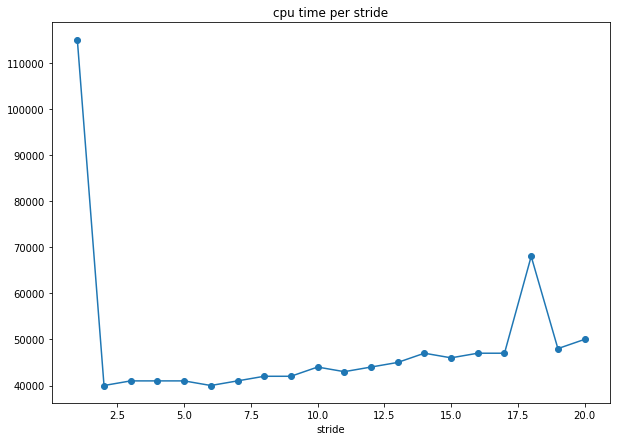

In [ ]:
data.set_index('stride')['cpu time'].plot(kind = 'line', marker = 'o',figsize = (10,7),title = 'cpu time per stride')

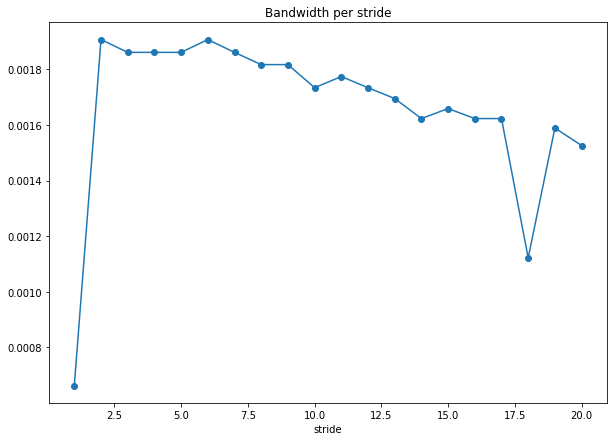

In [ ]:
data.set_index('stride')[' Badwidth'].plot(kind = 'line', marker = 'o',figsize = (10,7),title = 'Bandwidth per stride')

## CPU time

In [ ]:
path1 = "/content/gdrive/My Drive/HPC/result_cpu.csv"

In [ ]:
data1 = pd.read_csv(path1,header = 0)

In [ ]:
data1.keys()

Index(['stride', 'cpu time-O0', ' cpu time-O2', 'Unnamed: 3'], dtype='object')

In [ ]:
data1 = data1[['stride', 'cpu time-O0', ' cpu time-O2']]

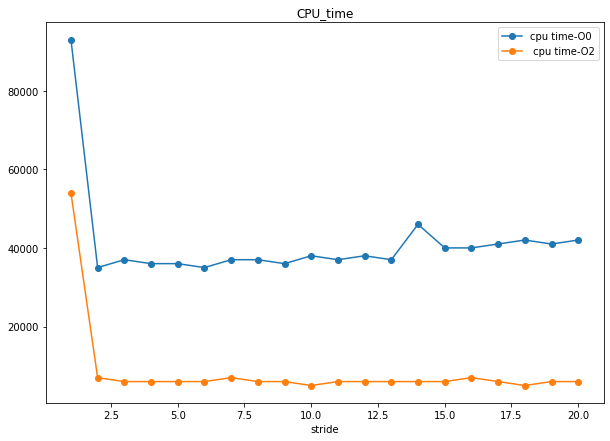

In [ ]:
data1.set_index('stride').plot(kind = 'line', marker = 'o',figsize = (10,7),title = 'CPU_time')

## Bandwidth 

In [ ]:
path2 = "/content/gdrive/My Drive/HPC/result_band.csv"

In [ ]:
data2 = pd.read_csv(path2,header = 0)

In [ ]:
data2.keys()

Index(['stride', 'Bandwidth-O0', ' Bandwidth-O2'], dtype='object')

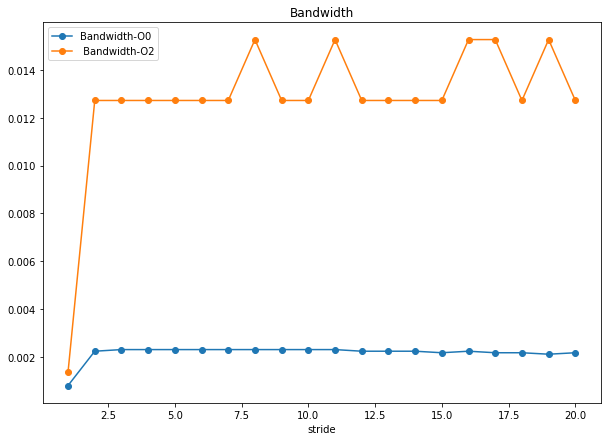

In [ ]:
data2.set_index('stride').plot(kind = 'line', marker = 'o',figsize = (10,7),title = 'Bandwidth')

# EX2

In [ ]:
import time

In [ ]:
N = 500
X = np.random.random((N,N))+1
Y = np.random.random((N,N))+1

In [ ]:
Z = np.zeros((N,N))

## Produit naif

In [ ]:
#produit naif des deux matrices
start = time.time()
for i in range(N):
  for j in range(N):
    for k in range(N):
      Z[i,j] = Z[i,j] + X[i,k]*Y[k,j]

end = time.time()
msec_t = (end-start)*1000
msec_t

112443.34292411804

## Produit par blocks

In [ ]:
def block_prod(x,y,b):#b is the block size
    N = len(x) # the size of the matrix
    Z = np.zeros((N,N)) # the resulting matrix
    # matrix to save the blocks we in each iteration :
    r = np.zeros((b,b)) 
    u = np.zeros((b,b)) 
    v = np.zeros((b,b))
    p = N/b
    #start = time.time()
    for i in range(0, N, b):
        for j in range(0, N, b):
            for l in range(0, b): # iterating the rows
                for c in range(0, b): #iterating the columns
                    r[l,c] = Z[i+l,j+c]
            for k in range(0, N, b):
                for l in range(0, b):
                    for c in range(0, b):
                        u[l,c] = x[i+l,k+c]
                        v[l,c] = y[k+l,j+c]
                for m in range(0, b):
                    for p in range(0, b):
                        for q in range(0, b):
                            r[m,p] = r[m,p] + u[m,q]*v[q,p]
            for l in range(0, b):
                for c in range(0, b):
                    Z[i+l,j+c] = r[l,c]
    end = time.time()
    #ms_t = (end-start)*1000
    return Z#,ms_t

In [ ]:
a,t = block_prod(X,Y,50)

In [ ]:
t

687.6876354217529

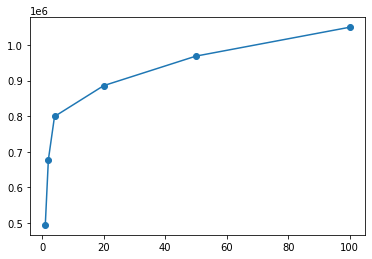

In [ ]:
sizes = np.array([1,2,4,20,50,100])
T = np.zeros(len(sizes))
for s in range(len(sizes)) :
  strat = time.time()
  a = block_prod(X,Y,sizes[s])
  end = time.time()
  T[s] =  (end-start)*1000
plt.plot(sizes,T,marker = 'o')
plt.title = 'time_cpu per blocs nb'
plt.xlabel = 'bloc'
plt.ylabel = 'time cpu'


In [ ]:
T[1]

677959.5942497253